In [95]:
import pandas as pd

mri_csv = "./tables/All_Subjects_Key_MRI_02Feb2026.csv"
pet_csv = "./tables/All_Subjects_Key_PET_02Feb2026.csv"

##### MRI

In [96]:
# Read csv file
df_mri = pd.read_csv(mri_csv)

# Filter for T1 weighted scans
df_mri = df_mri[ df_mri["series_type"] == "T1w"]

# Add group description
df_mri["group"] = "MRI-T1-3T"
df_mri.loc[ df_mri["magnetic_field_strength"] == 1.5, "group"] = "MRI-T1-1.5T"

# Keep only relevant columns 
df_mri = df_mri[ ["image_id", "image_date","subject_id", "group"]]

print(len(df_mri))
df_mri.head()

20567


,image_id,image_date,subject_id,group
1,91145,2008-02-20,037_S_1421,MRI-T1-1.5T
2,91146,2008-02-20,037_S_1421,MRI-T1-1.5T
4,118124,2008-09-17,037_S_1421,MRI-T1-1.5T
5,118125,2008-09-17,037_S_1421,MRI-T1-1.5T
7,143718,2009-05-13,037_S_1421,MRI-T1-1.5T


##### PET

In [97]:
# Read csv file
df_pet = pd.read_csv(pet_csv)

# Filter for scans explicitly described as tau, amyloid or fdg
df_pet = df_pet[ (df_pet["tau_pet"] == "Y") | 
                 (df_pet["amyloid_pet"] == "Y") | 
                 (df_pet["radiopharmaceutical"] == "18F-FDG")]

# Add modality description based on radiopharmaceutical
df_pet["group"] = "PET-" + df_pet["radiopharmaceutical"].apply(lambda x : x[4:])

# Keep only relevant columns
df_pet = df_pet[ ["image_id","image_date","subject_id","group"]]

##### Merge dataframes

In [98]:
df_multimodal = pd.concat([df_mri, df_pet])
df_multimodal.to_csv("./dataset_multimodal.csv", index=False)

##### Some statistics

In [99]:
import pandas as pd

df_multimodal = pd.read_csv("./dataset_multimodal.csv")

In [88]:
# Number of patients
len(df_multimodal["subject_id"].unique())

3289

<Axes: ylabel='Frequency'>

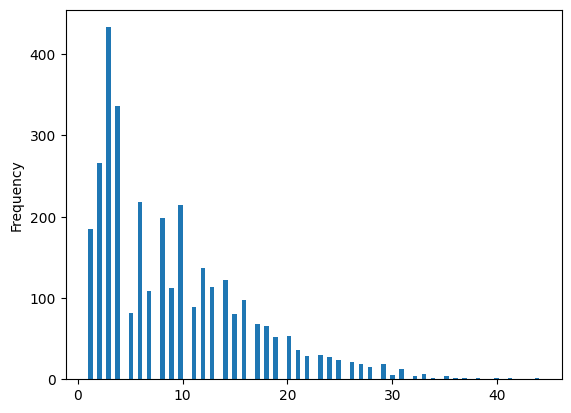

In [89]:
# Distribution of number of scans per patient
df_multimodal.groupby("subject_id")["image_id"].nunique().plot.hist(bins=100)

<Axes: ylabel='Frequency'>

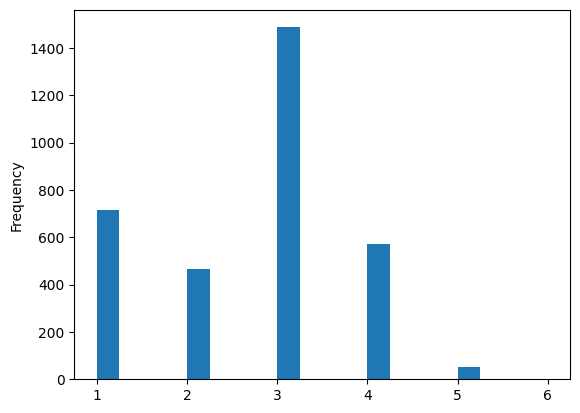

In [90]:
# Distribution of number of groups per scan
df_multimodal.groupby("subject_id").nunique()["group"].plot.hist(bins=20)